# <p style="padding:10px;background-color:#324459;margin:0;color:#eab578;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Practice Machine Learning</p>



<p style="text-align:justify; ">

**K-Nearest Neighbor (Breast Cancer Dataset)**

K-Nearest Neighbors Algorithm In Python, by example

Introductory guide to K-Nearest Neighbors via a code example

<p style="text-align:center; ">
<img src="https://miro.medium.com/max/720/1*1rZZ4RLlZvIq1aOqA1lEZw.png" style='width: 600px; height: 300px;'>
    
<p style="text-align:justify; ">
In statistics, the k-nearest neighbors algorithm (k-NN) is a non-parametric supervised learning method first developed by Evelyn Fix and Joseph Hodges in 1951, and later expanded by Thomas Cover. It is used for classification and regression. In both cases, the input consists of the k closest training examples in a data set. The output depends on whether k-NN is used for classification or regression:
    
   In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small).
    
   If k = 1, then the object is simply assigned to the class of that single nearest neighbor. In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.

    
<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#324459;margin:0;color:#eab578;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table Of Contents</p>   
    

    
|No  | Contents |No  | Contents  |
|:---| :---     |:---| :----     |
|1   | [<font color="#324459"> K-Nearest Neighbors (KNN)</font>](#1)                   |6   | [<font color="#324459"> Precision score</font>](#6)       
|2   | [<font color="#324459"> Creating dataset</font>](#2)                         |7   | [<font color="#324459"> Improving data accuracy</font>](#7)   |       
|3   | [<font color="#324459"> Creating model</font>](#3)                   |8  | [<font color="#324459"> Other ways to improving data accuracy</font>](#8)|  
|4   | [<font color="#324459"> Accuracy score</font>](#4)                 |9  | [<font color="#324459"> Summary</font>](#9)   |    
|5   | [<font color="#324459"> Recall score</font>](#5)         

<a id="1"></a>
# <p style="padding:10px;background-color:#324459;margin:0;color:#eab578;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">K-Nearest Neighbors (KNN)</p>

KNN is a supervised machine learning algorithm that can be used to solve both classification and regression problems. The principal of KNN is the value or class of a data point is determined by the data points around this value.

To understand the KNN classification algorithm it is often best shown through example. This tutorial will demonstrate how you can use KNN in Python with your own classification problems. The Jupyter Notebook which corresponds to this example can be found here, in case you would like to follow along.

The prediction algorithm calculates the distance from unknown point x, to all the points in your data. The points in your data are then sorted by increasing distance from x. The prediction is made by predicting the majority label from ‘K’ closest points.

Choosing a K will affect what class a new point will be assigned to.

In the example below, choosing a K value of 2 will assign unknown point (black circle) to class 2. However, if the K value is 7, the unknown point will be assigned to class 1.

<p style="text-align:center; ">
<img src="https://miro.medium.com/max/640/1*Y7TcGMLR6BzhbYjxklWMWw.png">

<a id="2"></a>
# <p style="padding:10px;background-color:#324459;margin:0;color:#eab578;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Creating dataset</p>

First, we import the libraries will we need, and then create a fake dataset using the makeblobs function from sklearn. We can pass in the number of samples, the features in our dataset, how many centres or classes the data will fall into, and finally the standard deviation of those clusters. For consistency between multiple runs of this Jupyter notebook, I have assigned the integer 42 to the random_state parameter.

Note, to begin, we will have a large cluster standard deviation. This will introduce variance into the classification, which we can improve on later, by specifically choosing the optimal K value. This can be achieved using the elbow method.

<img src = "https://machinelearninghd.com/wp-content/uploads/2021/02/knn.png">

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [4]:
type(cancer)

sklearn.utils.Bunch

In [5]:
cancer.data.shape

(569, 30)

In [6]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

<a id="3"></a>
# <p style="padding:10px;background-color:#324459;margin:0;color:#eab578;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Creating model</p>

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

In [11]:
print ('Shape of Train Data: ', X_train.shape)
print ('Shape of Train Data: ', X_test.shape)

Shape of Train Data:  (426, 30)
Shape of Train Data:  (143, 30)


In [12]:
y_train.shape

(426,)

<AxesSubplot:ylabel='count'>

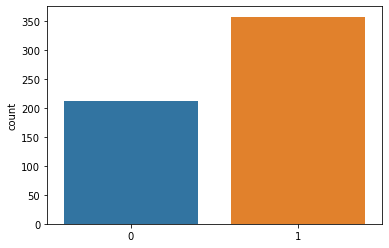

In [13]:
sns.countplot(cancer.target)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier()

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

In [25]:
knn.score(X_train, y_train)

0.9342723004694836

In [26]:
knn.score(X_test, y_test)

0.965034965034965

<a id="4"></a>
# <p style="padding:10px;background-color:#324459;margin:0;color:#eab578;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Accuracy score</p>

In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9342723004694836
0.965034965034965


<a id="5"></a>
# <p style="padding:10px;background-color:#324459;margin:0;color:#eab578;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Recall score</p>

In [22]:
from sklearn.metrics import recall_score
print(recall_score(y_train, y_pred_train,average='macro'))
print(recall_score(y_test, y_pred_test,average='macro'))

0.920484602304931
0.957344985434873


<a id="6"></a>
# <p style="padding:10px;background-color:#324459;margin:0;color:#eab578;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Precision score</p>

In [23]:
from sklearn.metrics import precision_score
print(precision_score(y_train, y_pred_train,average='macro'))
print(precision_score(y_test, y_pred_test,average='macro'))

0.9384604018912529
0.9684569479965899


<a id="7"></a>
# <p style="padding:10px;background-color:#324459;margin:0;color:#eab578;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Improving data accuracy</p>

We can attempt to improve the accuracy of our results by modifying the number of neighbours. This can be achieved using the elbow method.

We first iterate through 40 neighbor values, instaniate a KNeighborsClassifier object with that number of neighbors. We can then fit the training data to this KNN model, get the predictions, and append the mean value between the predictions, pred_i and the correct values, y_test.

Where pred_i and y_test do not match up in the array, a true value is returned which has a value of 1. The higher this number, the more inaccurate the classification will be.

The lower value for the error rate will correspond to a better performing model.

These results can be plotted using the range of i values on the x-axis, versus the error rate on the y-axis.

In [32]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Now we can pick the lowest value of K which will return, the lowest error rate. Here, we can choose 11 or 12.

Text(0.5, 0, 'k')

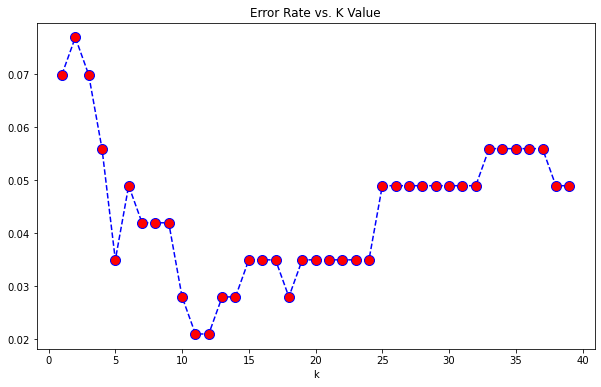

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('k')

<a id="8"></a>
# <p style="padding:10px;background-color:#324459;margin:0;color:#eab578;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Other ways to improving data accuracy</p>

Text(0.5, 0, 'k')

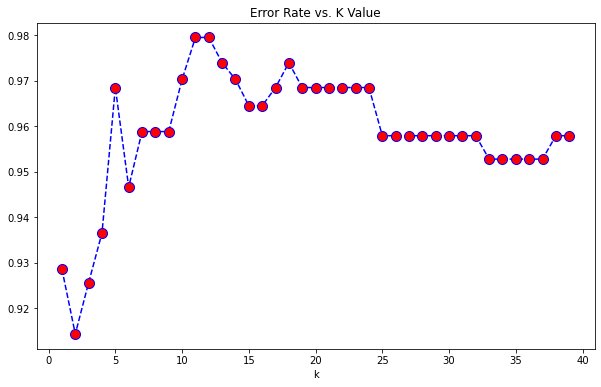

In [36]:
recall_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    recall_rate.append(recall_score(pred_i, y_test, average='macro'))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),recall_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('k')

Text(0.5, 0, 'k')

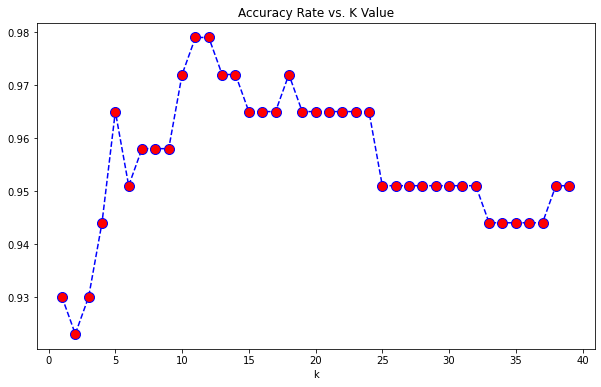

In [39]:
accuracy_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracy_rate.append(accuracy_score(pred_i, y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('k')

Text(0.5, 0, 'k')

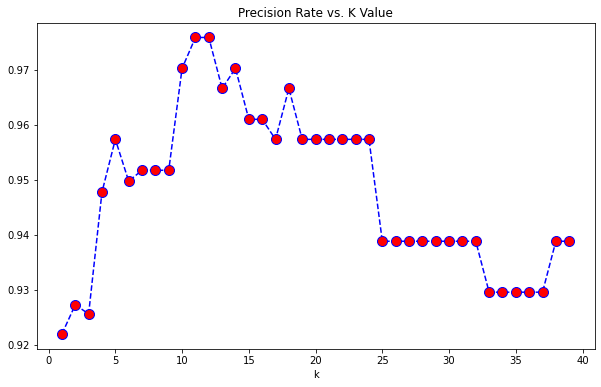

In [40]:
precision_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    precision_rate.append(precision_score(pred_i, y_test, average='macro'))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),precision_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Precision Rate vs. K Value')
plt.xlabel('k')

In [41]:
knn = KNeighborsClassifier(n_neighbors=12)

In [46]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [47]:
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

In [48]:
knn.score(X_train, y_train)

0.9366197183098591

In [49]:
knn.score(X_test, y_test)

0.9790209790209791

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#324459;margin:0;color:#eab578;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Accuracy score for neighbors = 12</p>

In [50]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9366197183098591
0.9790209790209791


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#324459;margin:0;color:#eab578;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Recall score for neighbors = 12</p>

In [51]:
from sklearn.metrics import recall_score
print(recall_score(y_train, y_pred_train,average='macro'))
print(recall_score(y_test, y_pred_test,average='macro'))

0.9249480445871907
0.9758635039533916


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#324459;margin:0;color:#eab578;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Precision score for neighbors = 12</p>

In [52]:
from sklearn.metrics import precision_score
print(precision_score(y_train, y_pred_train,average='macro'))
print(precision_score(y_test, y_pred_test,average='macro'))

0.938738936434789
0.9794549266247379


Now we can re-evaluate and observe that Accuracy, Recall and Precision have increased

<a id="9"></a>
# <p style="padding:10px;background-color:#324459;margin:0;color:#eab578;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Summary</p>

KNNs are simple, the training is trivial, and it is easy to add more data. Further, there are few parameters. In this tutorial guide, I have only included the K parameter (n_neighbors) in the call to the KNeighborsClassifier class.

KNNs do have drawbacks, however, which include a high prediction costs, which is worse for large datasets. KNNs are also sensitive to outliers, because outliers have an impact on the nearest points. Furthermore, they are not good with high dimensional datasets, and categorical features do not work well. The KNN algorithm becomes slow with more data, as the model needs to store all of these data points, in order to determine the distance between them.

This example is contrived and is mainly aimed at understanding how to code a KNN in Python. I deliberately made the dataset using makeblobs to illustrate how useful this function is as a tool to practise KNNs. if you would like to get my entire Jupyter Notebook, it is available here.

Have a go at changing the cluster standard deviation to be a higher value, and then attempting to optimise the KNN classification using the K value with the lowest error rate.

In addition, KNNs can be used with to classify multiple classes. This could further be altered in the makeblobs function call by increasing the value passed to centers. These parameters can easily be adjusted and will aid the understanding of KNNs, so we can effectively incorporate them into our analysis.